## Анализ и прогнозирование временных рядов методами искусственного интеллекта

### **Практическая работа 7. Востановление пропусков и прогноз значений временного ряда.**


#### **7.1 Аналитечкие методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с базовыми, аналитическими методами восстановления временных рядов.
Для выполнения данного пункта из каждой группы методов, представленных в ***табл. 7.1*** вам необходимо выбрать по одному методу восстановления ряда. При работе с первой группой, вам необходимо самостоятельно реализовать выбранный метод.  

**Табл. 7.1** - Группы аналитических методов восстановления.
№|Название группы|Модели и методы|
--|----|----|
1|Заполнение существующими значениями ряда|Средним, медианной, Hot-Deck|
2|Заполнение на основе близки значений|[Интерполяция](https://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html),  [KNNi](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html)|
3|На основе матричных разложений|[CD-Rec](#Fixme:Дат ссылку), [SVD](https://pypi.org/project/fancyimpute/)|

##### 7.1.1 Загрузка и подготовка данных
В данной работе вы будете использовать следующие наборы данных:
1. фывфыв
2. фывфв

In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir(r'/content/drive/MyDrive/TimeSeriesCourse/practice/07 Imputation and Forecast')

In [5]:
path_data = Path('datasets')/'madrid.txt'
madrid = np.loadtxt(path_data)[:,0]
print(madrid.shape)

(25000,)


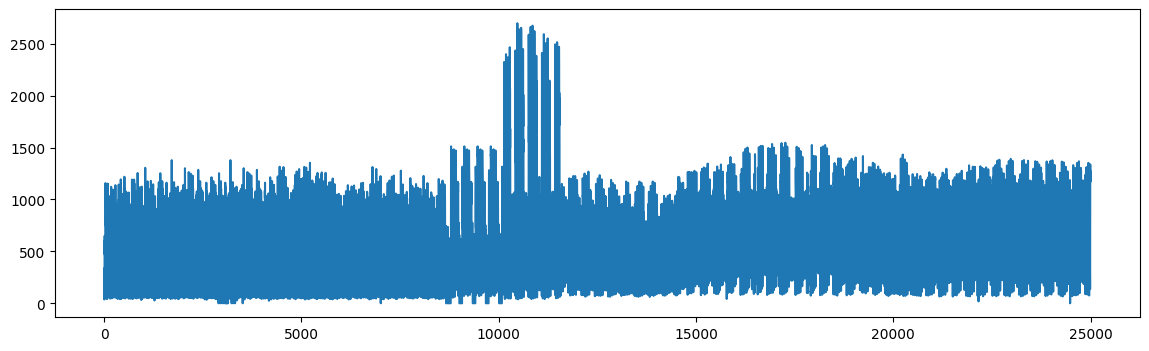

In [ ]:
fig, ax =  plt.subplots(figsize=(14,4),ncols=1,nrows=1)
plt.plot(madrid[:])
plt.show()

Самостоятельно реализуйте функцию, принимающую на вход многомерный временной ряд и возвращающий:
1. Все подпоследовательности временного ряда, в которых некоторые значения временного ряда были заменены nan значениями.
2. Индексы пропущенных значейни
   
Процен пппроущенных значений должен регулироваться тедельным параметром.


In [18]:
import torch
import random
def add_nan(x, percent = 0.25):
  perc_len = len(x)*0.25
  len_x = len(x)
  new_x = x.copy()
  indices = []
  #print(np.shape(new_x))
  while sum(np.isnan(new_x)) < perc_len:
    index = random.randint(0, len_x-1)
    new_x[index] = np.nan
    indices.append(index)
  return new_x, indices

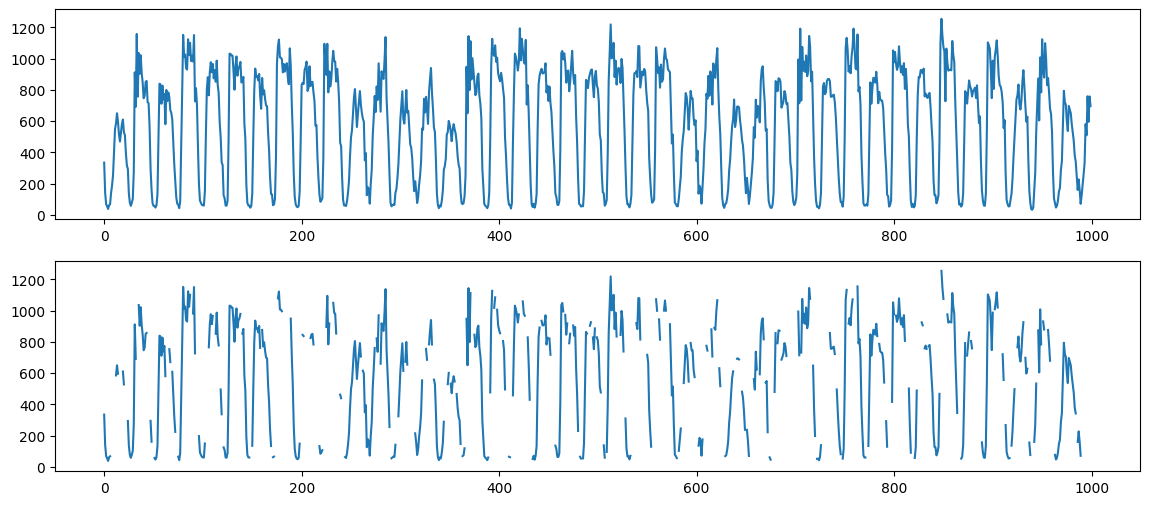

In [ ]:
madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_with_nan[:1000])
plt.show()

In [ ]:
recovery = {}

##### 7.1.2 Заполнение существующими значениями ряда


In [ ]:
madrid_mean = madrid_with_nan.copy()
madrid_mean[index] = np.nanmean(madrid_mean)
recovery['mean'] = madrid_mean

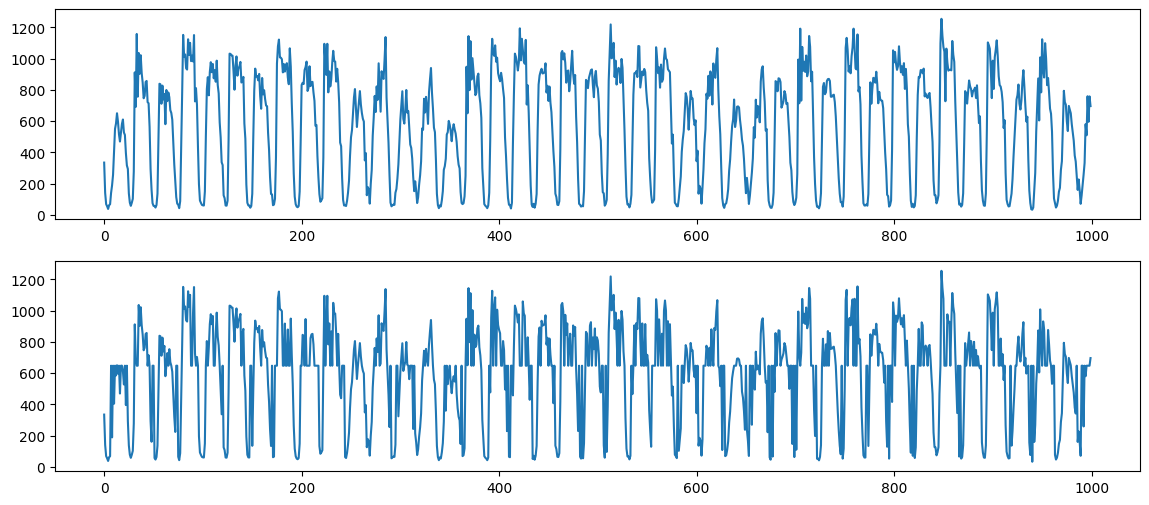

In [ ]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_mean[:1000])
plt.show()

In [ ]:
madrid_median = madrid_with_nan.copy()
madrid_median[index] = np.nanmedian(madrid_median)

In [ ]:
recovery['median'] = madrid_median

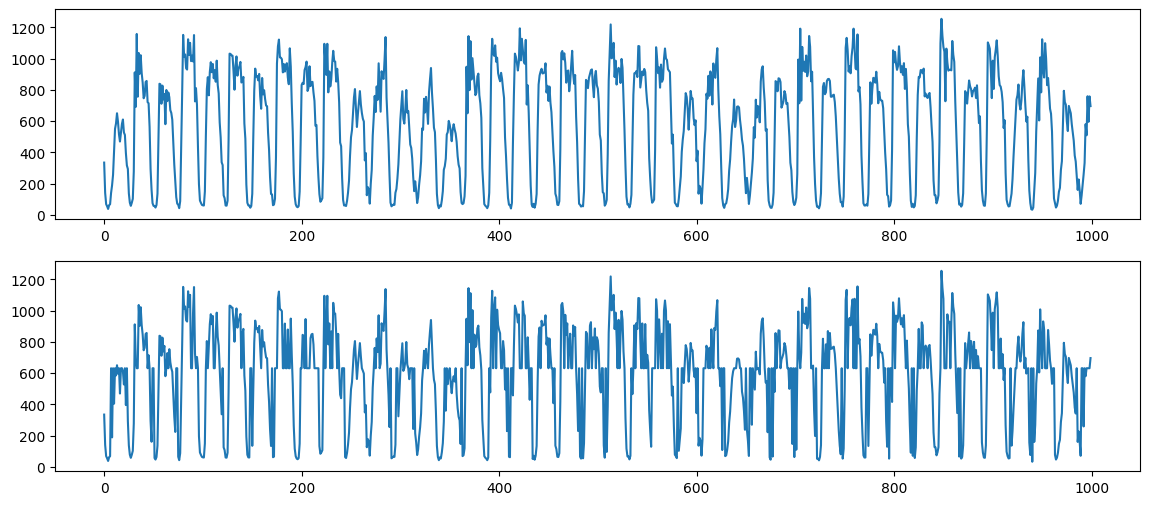

In [ ]:
#madrid_with_nan, index = add_nan(madrid)
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_median[:1000])
plt.show()

Самостоятельно реализуйте один метод из первой группы ***табл. 7
.1*** и проведите востановление данных, сохратив результаты востановления.

Hot-Deck

In [ ]:
def hot_deck(x):
  new_x = x.copy()
  ind = np.arange(0, len(x), 1, dtype=int)
  new_sort = np.stack((new_x, ind))
  new_sort = new_sort[ :, new_sort[0].argsort()]
  for i in range(len(x)):
    if np.isnan(new_x[i]):
      ind_nan = new_sort[1][new_sort[1,:]==i][0]
      not_nan_found = True
      incr = 1
      while(not_nan_found):
        incr = -1 if ind_nan+1>=len(x) else incr
        ind_nan = ind_nan + incr
        not_nan_found = False if not np.isnan(new_sort[0][new_sort[1,:]==ind_nan]) else True
        new_x[i] = new_sort[0][new_sort[1,:]==ind_nan][0]
  return new_x

In [ ]:
madrid_hot_deck = madrid_with_nan.copy()
madrid_hot_deck = hot_deck(madrid_hot_deck)

In [ ]:
recovery['hot deck'] = madrid_hot_deck

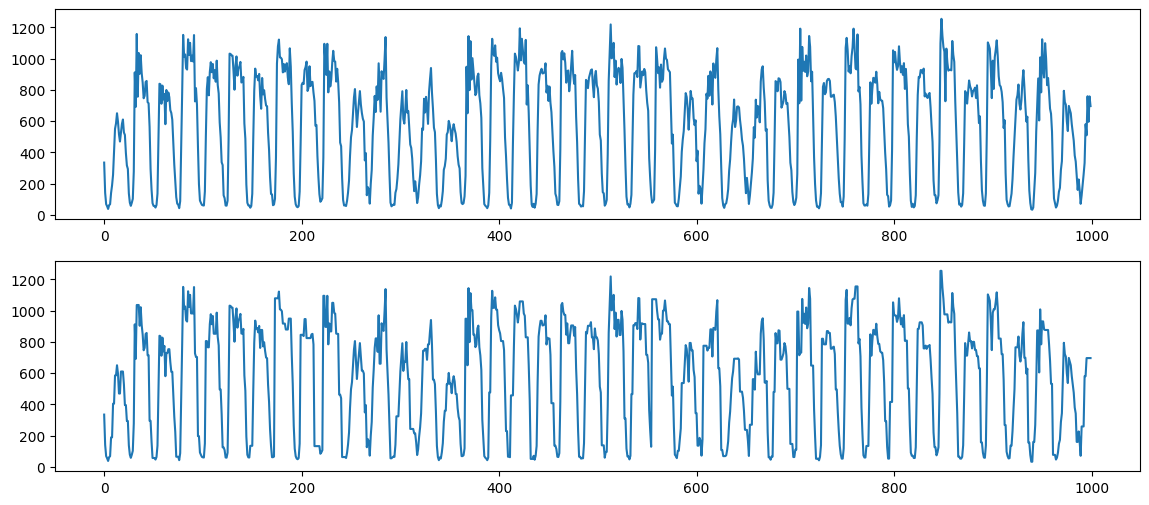

In [ ]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_hot_deck[:1000])
plt.show()

##### 7.1.3 Заполнение на основе близких значений


Используя документацию одного из методов востановления второй группы ***табл. .1*** и проведите востановление данных, сохратив результаты востановления.

In [ ]:
from sklearn.impute import KNNImputer

In [26]:
def rolling_window(a, window, intersection=False):
    # result = torch.zeros(size=(a.shape[0],a.shape[1]))
    returns = []
    if intersection:
        for i in range(0, a.shape[0]-window):
            returns.append(a[i:i + window])
    else:
        for i in range(0, a.shape[0],window):
            returns.append(a[i:i + window])
    return np.stack(returns)
madrid_slice = rolling_window(madrid_with_nan, 100)


In [ ]:
imputer = KNNImputer(n_neighbors=2)
madrid_KNNI = imputer.fit_transform(madrid_slice).flatten()

In [ ]:
recovery['KNNI'] = madrid_KNNI

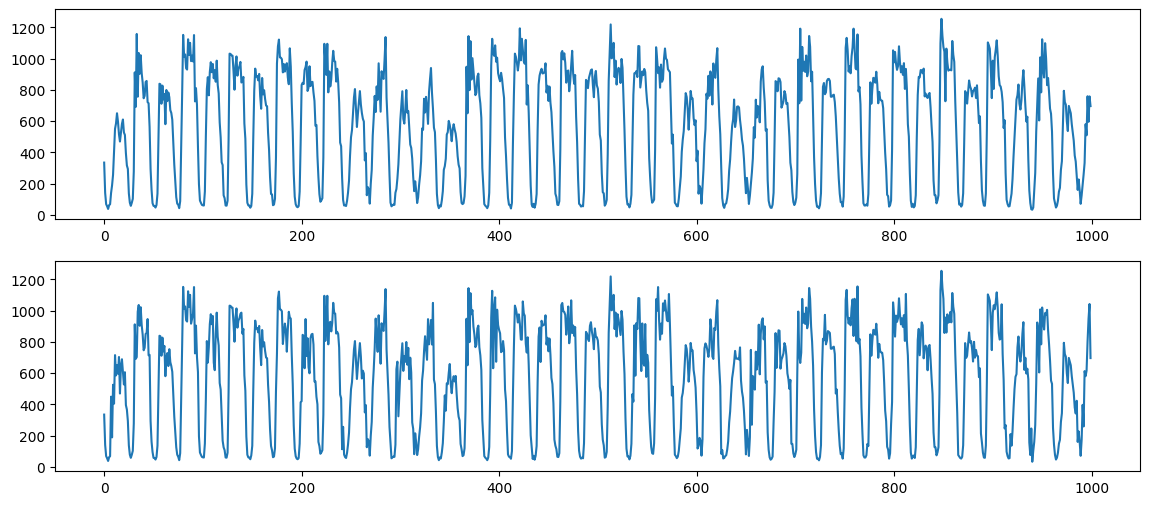

In [ ]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_KNNI[:1000])
plt.show()

##### 7.1.4 Заполнение на матричных преобразований

Используя документацию одного из методов востановления третей группы ***табл. 7.1*** и проведите востановление данных, сохратив результаты востановления.

In [ ]:
!pip install fancyimpute

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.6 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29880 sha256=f4863eb2ec6c9eac7da411c14affb90a456b66fb0c6ab15fd251f32a99db376a
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=24bf8b7693c2391eb5e75f7bb36cc83883585680254dda3eec2e16e8b1affb8e
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute


In [ ]:
from fancyimpute import IterativeSVD

In [80]:
from sklearn.metrics import mean_squared_error

In [ ]:
madrid_svd = IterativeSVD().fit_transform(madrid_slice).flatten()

[IterativeSVD] Iter 1: observed MAE=346.018705
[IterativeSVD] Iter 2: observed MAE=268.710532
[IterativeSVD] Iter 3: observed MAE=190.146182
[IterativeSVD] Iter 4: observed MAE=117.028379
[IterativeSVD] Iter 5: observed MAE=101.483551
[IterativeSVD] Iter 6: observed MAE=99.935479
[IterativeSVD] Iter 7: observed MAE=99.745376
[IterativeSVD] Iter 8: observed MAE=99.752095
[IterativeSVD] Iter 9: observed MAE=99.783989
[IterativeSVD] Iter 10: observed MAE=99.806145
[IterativeSVD] Iter 11: observed MAE=99.819634


In [ ]:
recovery['SVD'] = madrid_svd

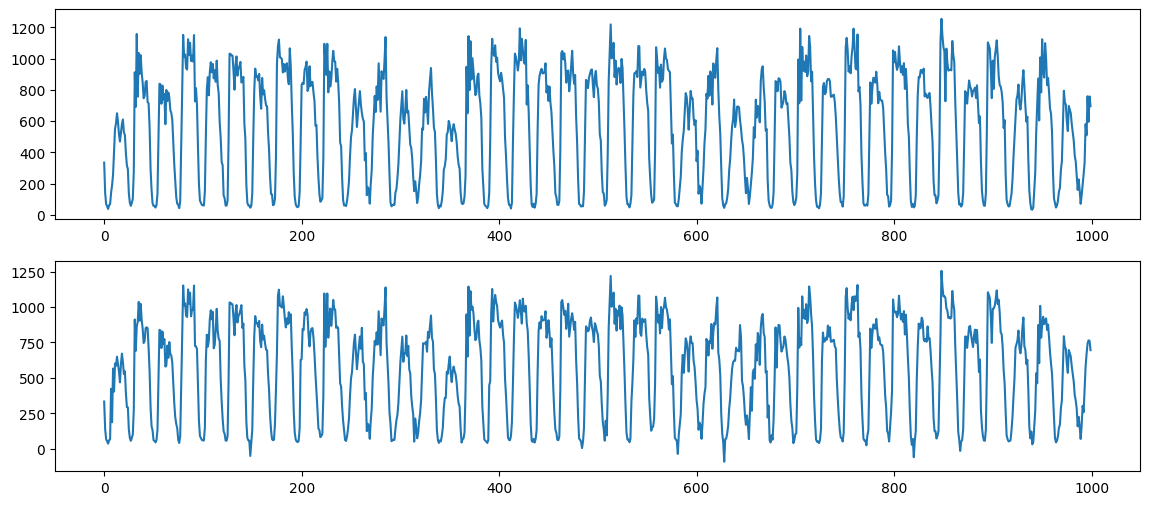

In [ ]:
fig, ax =  plt.subplots(figsize=(14,6),ncols=1,nrows=2)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid_svd[:1000])
plt.show()

##### 7.1.5 Сравнение результатов востановление.


Используя следующие библиотеки(список библиотек) отдельно для каждой группы методов постройте методов основные метрики оценки качества востановления.
На основе метрик отберите лучшие методы востановления метрик и выберите лучшую группу методов. Для лучших методов из каждой группы постройте графики сравнения реальных и восстановленных данных. Объясните результаты и сделайте вывод.



In [ ]:
for method in recovery.keys():
  print(method,mean_squared_error(madrid,recovery[method]),sep='\t')

mean	38937.41330430364
median	38975.66228
hot deck	11590.73112
KNNI	10434.76707
SVD	7454.892350371608


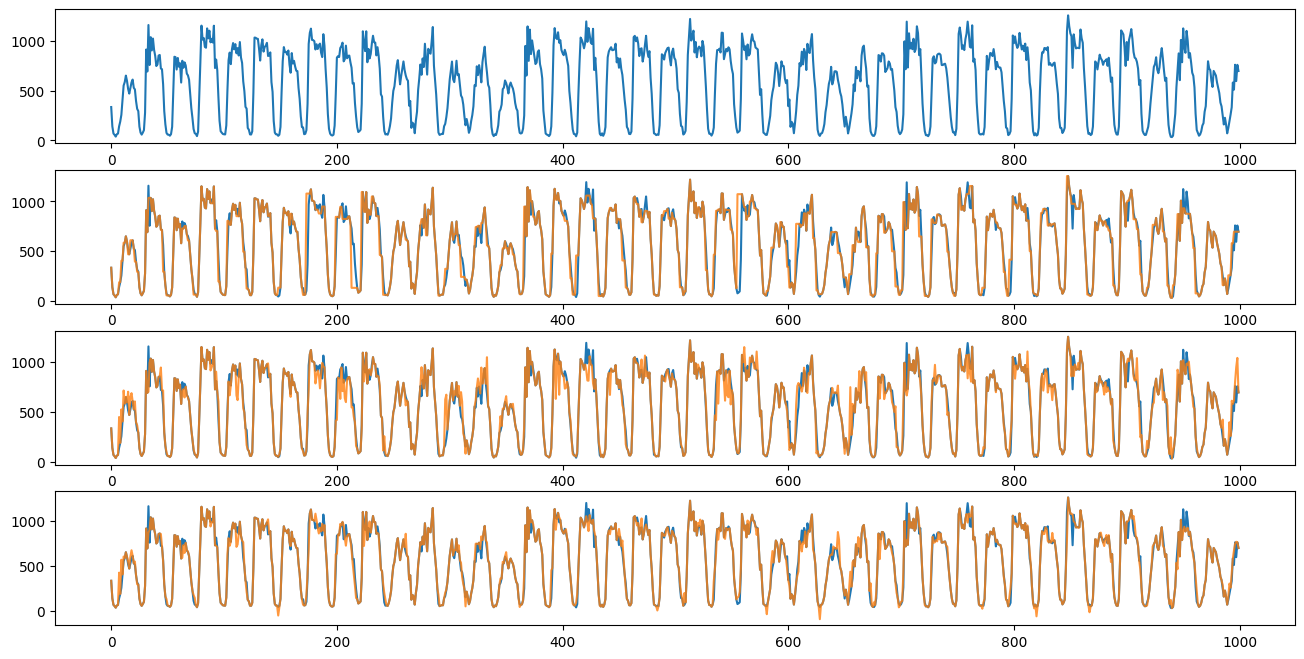

In [ ]:
fig, ax =  plt.subplots(figsize=(16,8),ncols=1,nrows=4)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid[:1000])
ax[2].plot(madrid[:1000])
ax[3].plot(madrid[:1000])
ax[1].plot(madrid_hot_deck[:1000],alpha=0.8)
ax[2].plot(madrid_KNNI[:1000],alpha=0.8)
ax[3].plot(madrid_svd[:1000],alpha=0.8)
plt.show()

*Вывод*:

Лучшие результаты при оценке качества восстановления значений показали методы SVD, KNNI и Hot Deck. Лучший результат был получен методм из 3 группы SVD.

#### **7.2 Нейросетевые методы востановления временного ряда**

##### *Краткое описание*

В данном пункте практической работы вам предстоит познакомиться с некоторыми нейросетевыми методами восстановления временных рядов.
Для выполнения данного пункта вам предстоит самостоятельно реализовать структуру нейросетевой, модели основанной на GRU нейронах и сравнить ее с другими нейросетевыми методами восстановления При сравнение с 3 группой из **табл.7. 2** вам необходимо выбрать **один** метод восстановлени.. Основные блоки обработки данных будут реализованы с использованиме Pytorch. Вам не запрещается использовать для реализации Keras.

**т*ал7 5.2** - Нейросетевые методы восстановления.
№|Название группы|Модели и методы|
--|-------------|----|
1|Линейные нейроны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html)|
 2eкрркуретные нейронны|[Pytorch](https://pytorch.org/docs/stable/generated/torch.nn.GRU.html)|
3|Сложные структуры|[SAITS, BRITS, M-RNN](https://github.com/WenjieDu/PyPOTS)|

In [154]:
recovery_nn = {}

##### 7.2.1 Загрузка и подготовка данных

In [7]:
path_data = '/content/drive/MyDrive/TimeSeriesCourse/practice/07 Imputation and Forecast/datasets/madrid.txt'
madrid = np.loadtxt(path_data)[:,:]
print(madrid.shape)

(25000, 10)


In [156]:
def add_nan_2D(x, percent = 0.25):
  x_with_nan = copy.deepcopy(x)
  nan_len = x.shape[0]*x.shape[1]*percent
  nan_counter = 0
  for i in range(x_with_nan.shape[0]):
    for j in range(x_with_nan.shape[1]):
      if nan_counter <= nan_len and random.randint(0,1):
        x_with_nan[i,j]=np.nan
        nan_counter +=1
  return x_with_nan, np.isnan(x_with_nan)


In [157]:
madrid_with_nan, index = add_nan_2D(madrid, 0.25)

In [43]:
#madrid_with_nan = rolling_window(madrid_with_nan, 100)

In [158]:
madrid_with_nan.shape

(25000, 10)

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
madrid_normal_with_nan = scaler.fit_transform(madrid_with_nan)
rolling_madrid = rolling_window(madrid_normal_with_nan, 100, True)
train, test = train_test_split(rolling_madrid,shuffle=False, test_size=0.33)

##### 7.2.2 Базовая модель востановлениях данных, построенная на нескольких слоях линейных нейроннах


Вам необходимо будет самостоятельно реализовать:
1. инициализацию nan значений какими либо другими значениями.
2. замер времени полного обучения и тестирования модели.

In [160]:
import torch
from torch import nn
from torch.utils.data import DataLoader

In [161]:
class LinearModel(nn.Module):
    def __init__(self, size_subsequent: int,dim = 1, nums_layers = 3, size_layers = 250):
        super().__init__()

        self.size_subsequent = size_subsequent
        self.nums_layers = nums_layers*dim
        self.dim = dim
        self.size_layers = size_layers

        self.start_layers = nn.Sequential(nn.Flatten(),
                                          nn.Linear(size_subsequent*dim, self.size_layers),
                                          nn.LeakyReLU())
        self.model = nn.ModuleList([
                                        (nn.Sequential(
                                                nn.Linear(self.size_layers, self.size_layers), nn.LeakyReLU()
                                            )
                                        )
                                    for x in torch.arange(nums_layers)])
        self.model = nn.Sequential(*self.model)

        self.output = nn.Sequential(nn.Linear(self.size_layers,size_subsequent*dim),nn.Tanh())

    def forward(self, x):
        x = self.start_layers(x)

        x=self.model(x)
        x=self.output(x)
        return x.reshape(x.shape[0],self.size_subsequent,self.dim)

In [166]:
model = LinearModel(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)

print(train.shape,test.shape)
epochs = 20

(16683, 100, 10) (8217, 100, 10)


In [167]:
model

LinearModel(
  (start_layers): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1000, out_features=250, bias=True)
    (2): LeakyReLU(negative_slope=0.01)
  )
  (model): Sequential(
    (0): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Linear(in_features=250, out_features=250, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
    )
  )
  (output): Sequential(
    (0): Linear(in_features=250, out_features=1000, bias=True)
    (1): Tanh()
  )
)

In [168]:
import time
times_model = {}

In [169]:
model=model.to(device)
train_history = []
valid_history = []

start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0] == batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan_2D(X,percent)
            ###вставка инициализации нулями nan значений
            X_i = X
            X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
            #X[torch.isnan(torch.from_numpy(np.array(X)))]=0.0
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    print('valid')
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0] == batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan_2D(X,percent)
                #X[torch.isnan(X)]=0.0
                X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

<ipython-input-169-73b8fbd5602c>:22: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


valid


<ipython-input-169-73b8fbd5602c>:38: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.021706632998597118, valid:0.010370323766571607
valid
epoch:2 train:0.012426237854036107, valid:0.009604363124673219
valid
epoch:3 train:0.010249606979532717, valid:0.009174461685871892
valid
epoch:4 train:0.009288344926546932, valid:0.008807646143141874
valid
epoch:5 train:0.008879124103078326, valid:0.008256617106872704
valid
epoch:6 train:0.008492084550118194, valid:0.008032075136668922
valid
epoch:7 train:0.008249742592688493, valid:0.007843195287467436
valid
epoch:8 train:0.007897798030840597, valid:0.007672931912333467
valid
epoch:9 train:0.007635629184586906, valid:0.00739990925243081
valid
epoch:10 train:0.007275195371259675, valid:0.006676700143071339
valid
epoch:11 train:0.006801179322945774, valid:0.006343503435712683
valid
epoch:12 train:0.006362310624984717, valid:0.005789615690361622
valid
epoch:13 train:0.005947278894598228, valid:0.005549157424577216
valid
epoch:14 train:0.005608114287242921, valid:0.0051269920726934835
valid
epoch:15 train:0.005396230069

In [170]:
times_model['linear']=end-start

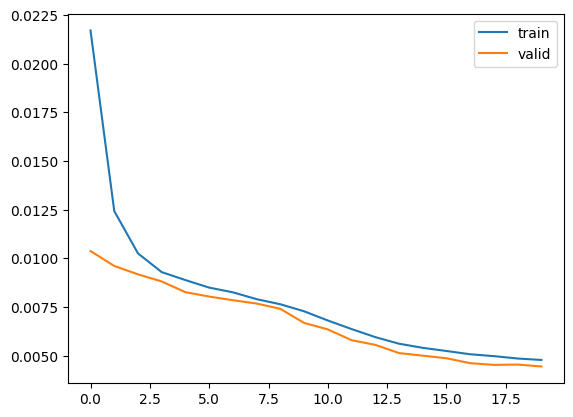

In [171]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

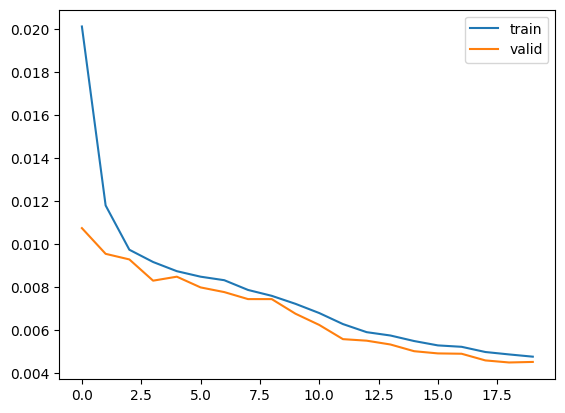

In [96]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [172]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        batch[nan]=0.0
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [173]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_linear = scaler.inverse_transform(test_madrid_normal)

In [174]:
recovery_nn['linear'] = test_linear

35256.86254231119


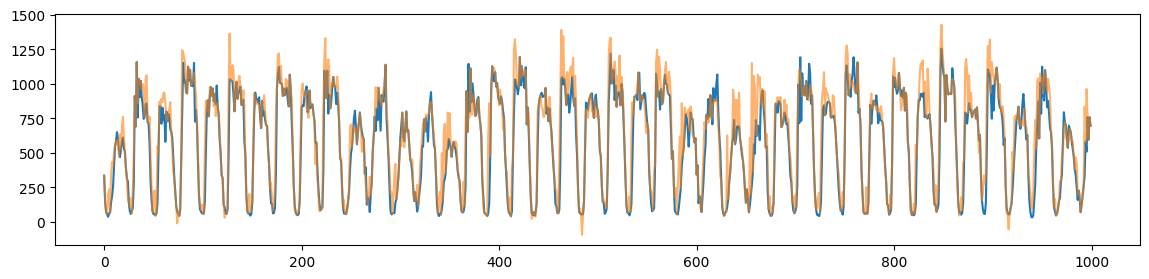

In [130]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_linear[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_linear[index].reshape(1,-1)))

##### 7.2.3 Реккурентная модель востановлениях данных


In [175]:
class EncoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size=dim,
                          hidden_size=self.hidden_size)

        self.latten = nn.Linear(hidden_size*size_subsequent,latten_size)
        self.leaky = nn.LeakyReLU()
        self.fl = nn.Flatten()
    def forward(self, x):
        x, _ = self.gru(x)
        x = self.leaky(x)
        #print(x.shape)
        x = self.fl(x)
        x = self.latten(x)
        return self.leaky(x)


In [176]:
class DecoderGRU(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.size_subsequent=size_subsequent
        self.dim = dim
        self.hidden_size = hidden_size
        self.latten_size=latten_size
        self.gru = nn.GRU(input_size=self.hidden_size,
                          hidden_size=dim)
        self.latten = nn.Linear(latten_size,hidden_size*size_subsequent)
        self.leaky = nn.LeakyReLU()

    def forward(self, x):
        x = self.latten(x)
        x = x.view(-1, self.size_subsequent, self.latten_size)
        x = self.leaky(x)
        x, _ = self.gru(x)
        return self.leaky(x)


In [177]:
class TimeAE(nn.Module):
    def __init__(self, size_subsequent: int, dim = 1, latten_size = 100, hidden_size=100):
        super().__init__()
        self.encoder = EncoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
        self.decoder = DecoderGRU(size_subsequent=size_subsequent,
                                 dim=dim,
                                 latten_size=latten_size,
                                 hidden_size=hidden_size)
    def forward(self, x):
        x=self.encoder(x)
        x = self.decoder(x)
        return x

In [178]:
model = TimeAE(size_subsequent=train.shape[1],dim=train.shape[2])
optimizer = torch.optim.Adam(model.parameters(),lr=1.0e-3)
loss_func = nn.MSELoss()
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
batch_size = 64
percent = 0.25

train_loader = DataLoader(train,batch_size=batch_size,shuffle=True)
valid_loader = DataLoader(test,batch_size=batch_size,shuffle=True)


epochs = 10

In [179]:
model

TimeAE(
  (encoder): EncoderGRU(
    (gru): GRU(10, 100)
    (latten): Linear(in_features=10000, out_features=100, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
    (fl): Flatten(start_dim=1, end_dim=-1)
  )
  (decoder): DecoderGRU(
    (gru): GRU(100, 10)
    (latten): Linear(in_features=100, out_features=10000, bias=True)
    (leaky): LeakyReLU(negative_slope=0.01)
  )
)

In [180]:
model=model.to(device)
train_history = []
valid_history = []
start = time.time()
for epoch in np.arange(epochs):
    train_loss =0
    valid_loss =0

    for i, x in enumerate(train_loader):
        if x.shape[0]==batch_size:
            optimizer.zero_grad()
            x = x.to(device).to(torch.float32)
            test_index = np.isnan(x.cpu().numpy())
            X = x.clone()
            X, nan = add_nan_2D(X,percent)
            #
            X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
            recovery = model(X)
            loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
            train_loss += loss.detach().cpu().item()
            loss.backward()
            optimizer.step()
    train_loss/=(i+1)
    with torch.no_grad():
        for i, x in enumerate(valid_loader):
            if x.shape[0]==batch_size:
                x = x.to(device).to(torch.float32)
                test_index = np.isnan(x.cpu().numpy())
                X = x.clone()
                X, nan = add_nan_2D(X,percent)
                #
                X = torch.from_numpy(np.where(np.isnan(X), 0.0, X))
                recovery = model(X)
                loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
                valid_loss += loss.detach().cpu().item()
    valid_loss/=(i+1)
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'epoch:{epoch+1} train:{train_loss}, valid:{valid_loss}')
end = time.time()

<ipython-input-180-6595bec4829a>:19: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])
/usr/local/lib/python3.10/dist-packages/torch/autograd/__init__.py:251: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
<ipython-input-180-6595bec4829a>:34: UserWarning: indexing with dtype torch.uint8 is now deprecated, please use a dtype torch.bool instead. (Triggered internally at ../aten/src/ATen/native/IndexingUtils.h:27.)
  loss = loss_func(recovery[(nan)&(~test_index)],x[(nan)&(~test_index)])


epoch:1 train:0.022357733492022275, valid:0.009962709570058095
epoch:2 train:0.008967926343938629, valid:0.007294792331784039
epoch:3 train:0.006938587927698404, valid:0.005752586301185133
epoch:4 train:0.005917633881870928, valid:0.005027962603079256
epoch:5 train:0.005283886936075729, valid:0.004524381163479515
epoch:6 train:0.004717384700545634, valid:0.004169328820480164
epoch:7 train:0.0044028074204051065, valid:0.0040720777672737145
epoch:8 train:0.004099058240680631, valid:0.00363458223214965
epoch:9 train:0.0038484695485268517, valid:0.003647502603789055
epoch:10 train:0.0036204009882434916, valid:0.0033396560529088096


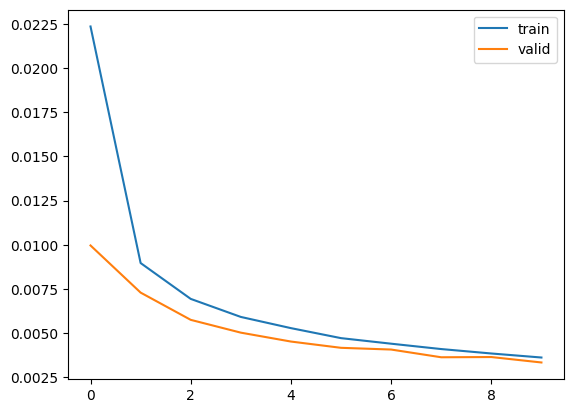

In [181]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

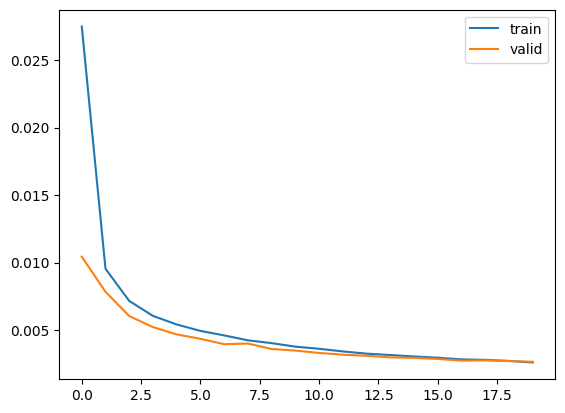

In [103]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

In [182]:
times_model['ae']=end-start

In [183]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
#test = []
with torch.no_grad():
    for idx, batch in enumerate(test_rolling_madrid):
        batch = torch.Tensor(batch).to(device)
        nan = torch.isnan(batch)
        #
        batch = torch.from_numpy(np.where(np.isnan(batch), 0.0, batch))
        rec = model(batch[None,:])[0].cpu().numpy()
        nan = nan.cpu().numpy()
        test_rolling_madrid[idx][nan]=rec[nan]

In [184]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_ae = scaler.inverse_transform(test_madrid_normal)

In [185]:
recovery_nn['test_ae'] = test_ae

55932.49409419336


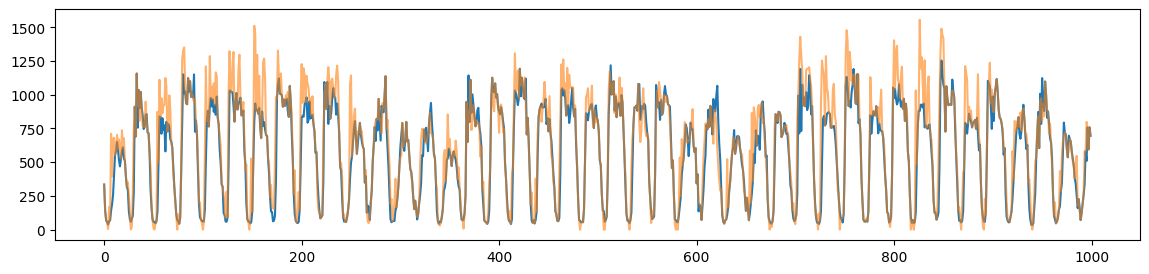

In [139]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_ae[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_ae[index].reshape(1,-1)))

##### 7.2.4 Сложные модели нейросетевого востановлениях данных


Вам необходимо выбрать одну модель из 3 группы таблицы 7.2 и используя документацию произвести восстановления того же ряда. Произведите замер времени.

In [71]:
!pip install pypots==0.0.9

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.6/81.6 kB 1.6 MB/s eta 0:00:00


In [186]:
from pypots.imputation import SAITS

In [222]:
model= SAITS(n_features=madrid.shape[1],
             n_steps=100,
             device=device,
             d_k=64,
             d_v=64,
             d_model=128,
             d_inner=128,
             n_head=4,
             n_layers=2,
             dropout=0.05,
             epochs=10)

Model initialized successfully. Number of the trainable parameters: 667608


In [223]:
start = time.time()
model.fit(train,test)
end = time.time()
times_model['saits']=end-start

epoch 0: training loss 0.1312, validating loss 0.0441
epoch 1: training loss 0.0743, validating loss 0.0364
epoch 2: training loss 0.0622, validating loss 0.0332
epoch 3: training loss 0.0555, validating loss 0.0313
epoch 4: training loss 0.0507, validating loss 0.0291
epoch 5: training loss 0.0472, validating loss 0.0280
epoch 6: training loss 0.0445, validating loss 0.0280
epoch 7: training loss 0.0425, validating loss 0.0256
epoch 8: training loss 0.0411, validating loss 0.0246
epoch 9: training loss 0.0399, validating loss 0.0244
Finished training.


In [145]:
test_rolling_madrid = rolling_window(madrid_normal_with_nan, 100, False)
test_rolling_madrid = model.impute(test_rolling_madrid)

In [146]:
test_madrid_normal = np.vstack(test_rolling_madrid)
test_saits = scaler.inverse_transform(test_madrid_normal)

In [227]:
recovery_nn['saits'] = test_saits

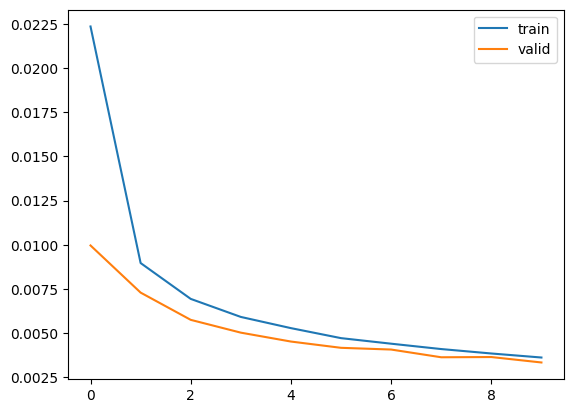

In [189]:
plt.plot(train_history,label='train')
plt.plot(valid_history,label='valid')
plt.legend()
plt.show()

10012.859546094607


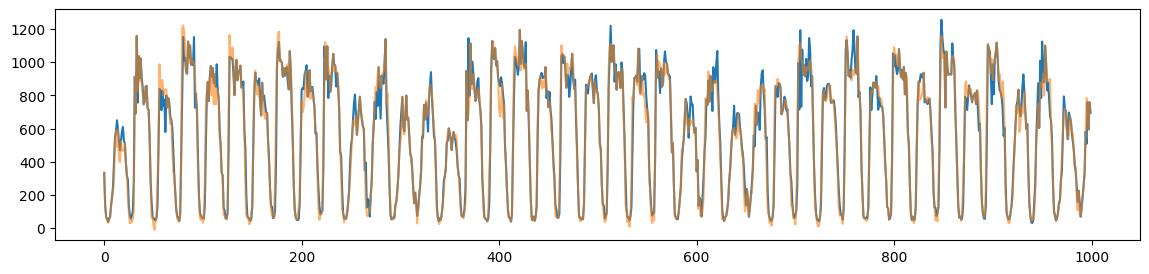

In [148]:
fig, ax =  plt.subplots(figsize=(14,3),ncols=1,nrows=1)

plt.plot(madrid[:1000,0])
plt.plot(test_saits[:1000,0],alpha=0.6)
print(mean_squared_error(madrid[index].reshape(1,-1),test_saits[index].reshape(1,-1)))

##### 7.2.5 Сравнения результатов.
Также, как и в пункте 7.1.5 постройте графики сравнения моделей. Дополнительно постройте графики сравнения времени. Сделайте выводы

In [228]:
for method in recovery_nn.keys():
  print(method,mean_squared_error(madrid[index].reshape(1,-1),recovery_nn[method][index].reshape(1,-1)),sep='\t')

linear	32787.31616973218
test_ae	26681.14747149726
saits	4796.615187862894


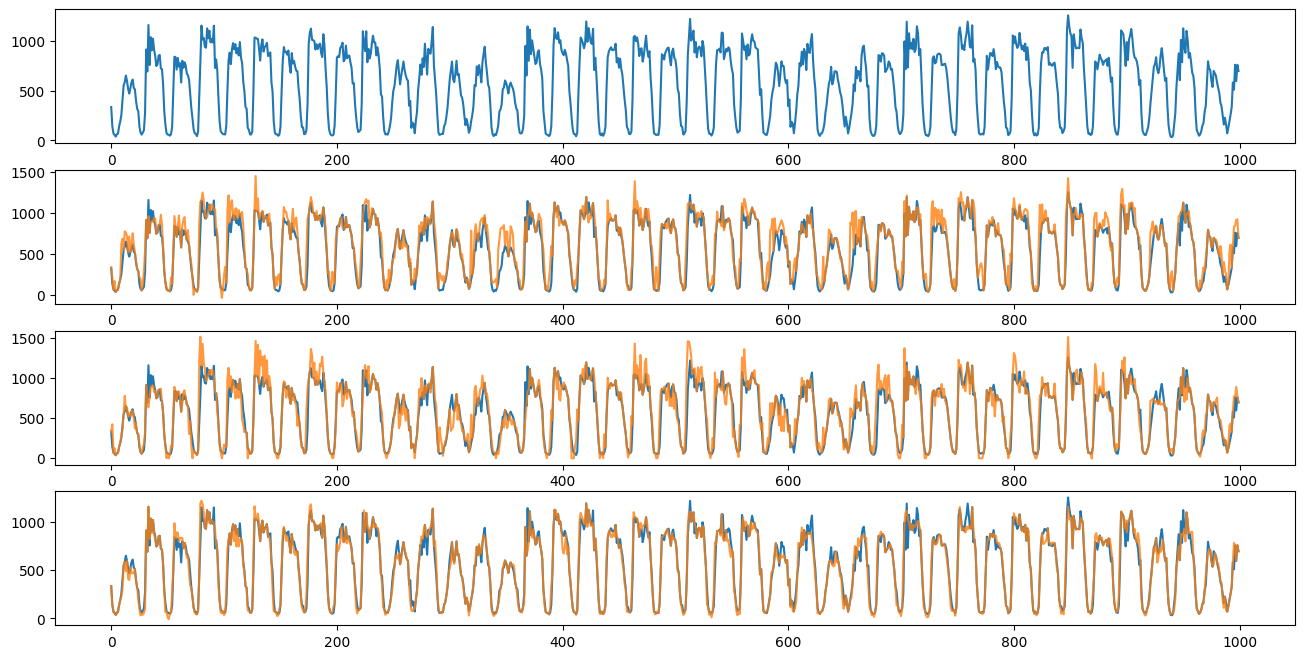

In [209]:
fig, ax =  plt.subplots(figsize=(16,8),ncols=1,nrows=4)
ax[0].plot(madrid[:1000])
ax[1].plot(madrid[:1000])
ax[2].plot(madrid[:1000])
ax[3].plot(madrid[:1000])
ax[1].plot(test_linear[:1000,0],alpha=0.8)
ax[2].plot(test_ae[:1000,0],alpha=0.8)
ax[3].plot(test_saits[:1000,0],alpha=0.8)
plt.show()

In [225]:
times_model.values()

dict_values([256.6364367008209, 463.3146207332611, 3034.028217792511])

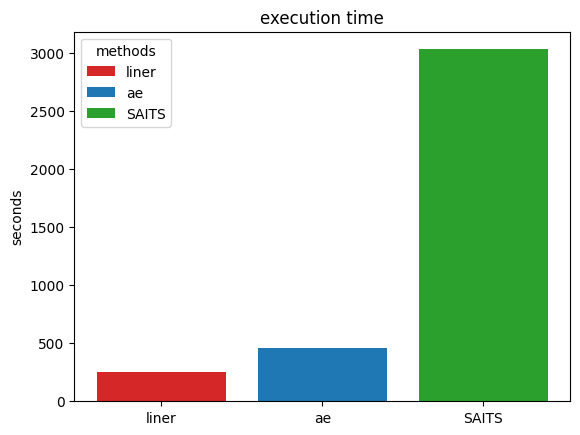

In [233]:
fig, ax = plt.subplots()

labels = ['liner', 'ae', 'SAITS']
counts = times_model.values()
bar_labels = ['liner', 'ae', 'SAITS']
bar_colors = ['tab:red', 'tab:blue', 'tab:green']
ax.bar(labels, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('seconds')
ax.set_title('execution time')
ax.legend(title='methods')

plt.show()

#### **7.3 Прогноз временного ряда**

##### *Краткое описание*

Используя модель и [ARIMA](реализация) произвидите прогноз ряда на следующие колличество точек: 1, 5, 10.
Сравните результаты. Постройте графики прогноза и точности прогноза.

In [11]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [17]:
import numpy as np, pandas as pd
from statsmodels.tsa.arima.model import ARIMA

In [9]:
mymodel = ARIMA(madrid[0], order =(1, 1, 1))
modelfit = mymodel.fit()
print(modelfit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -56.102
Date:                Mon, 18 Dec 2023   AIC                            118.205
Time:                        13:17:15   BIC                            118.796
Sample:                             0   HQIC                           116.928
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4080      0.492     -0.829      0.407      -1.373       0.557
ma.L1         -0.9971     43.033     -0.023      0.982     -85.341      83.347
sigma2      1.098e+04   4.74e+05      0.023      0.9

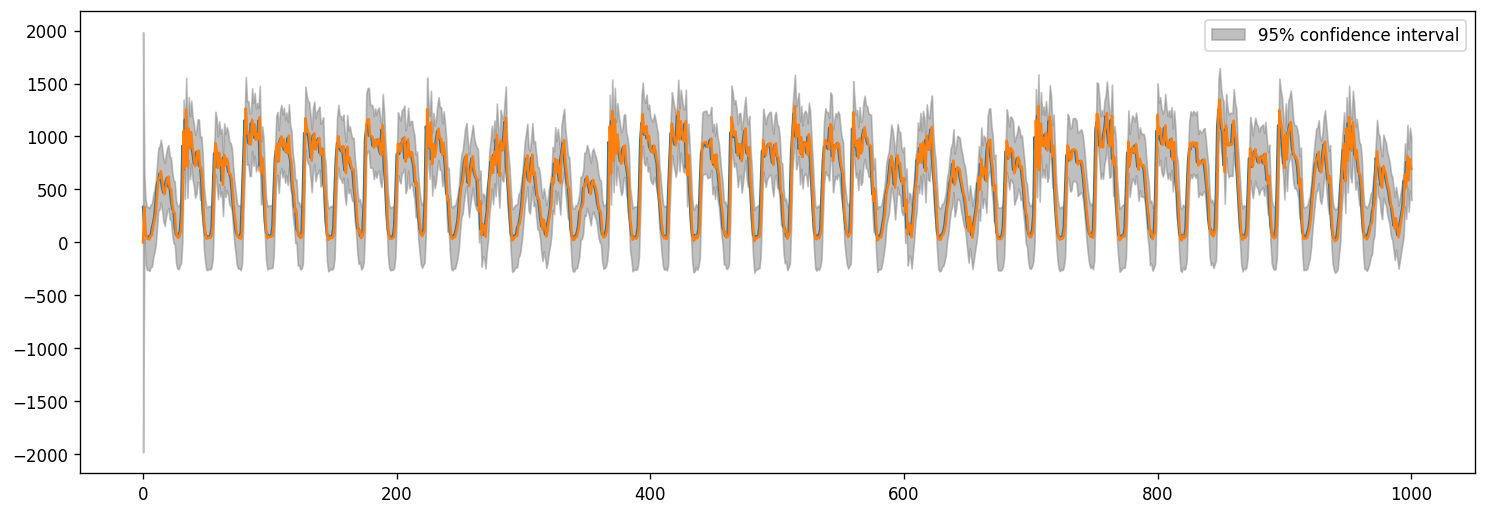

In [266]:
plt.rcParams.update({'figure.figsize' :(15,5), 'figure.dpi' : 120})
mymodel = ARIMA(madrid[:1000,0], order =(1, 1, 1))
modelfit = mymodel.fit()

fig, ax = plt.subplots()
ax.plot(madrid[:1000,0])
plot_predict(modelfit,0,1000, ax=ax)
plt.show()

In [10]:
mymodel = ARIMA(madrid[0], order =(1, 1, 5))
modelfit = mymodel.fit()
print(modelfit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   10
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 -52.353
Date:                Mon, 18 Dec 2023   AIC                            118.705
Time:                        13:17:29   BIC                            120.086
Sample:                             0   HQIC                           115.726
                                 - 10                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0360      4.992      0.007      0.994      -9.749       9.821
ma.L1         -1.5991   2015.308     -0.001      0.999   -3951.531    3948.333
ma.L2          1.0327   2000.332      0.001      1.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


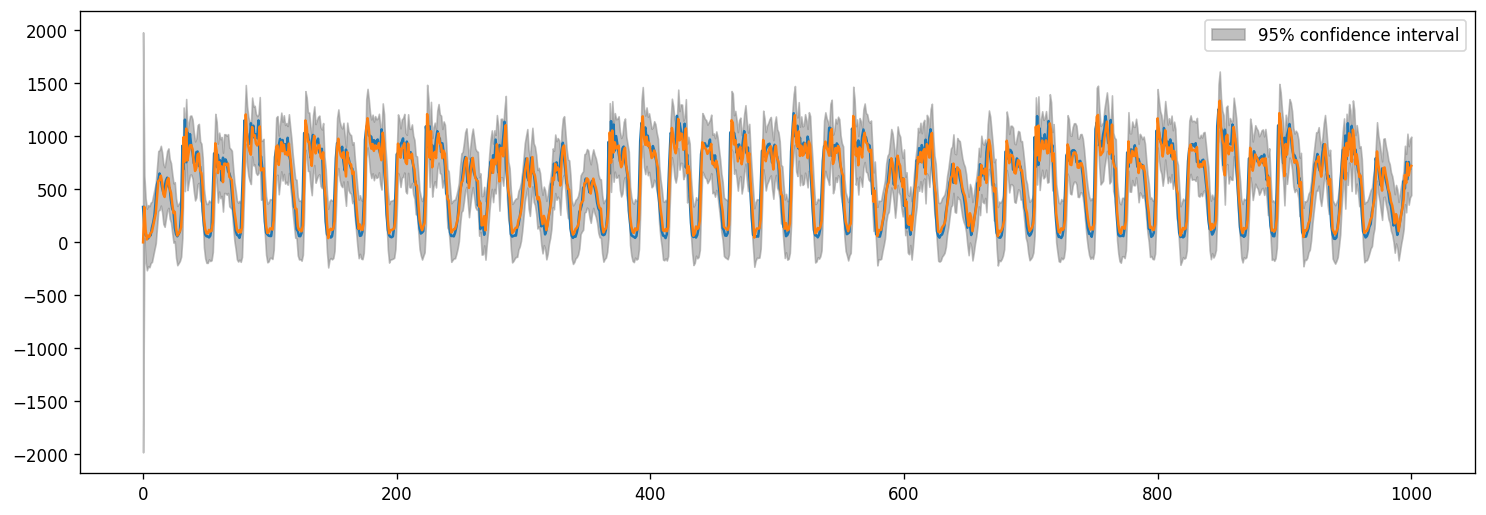

In [13]:
plt.rcParams.update({'figure.figsize' :(15,5), 'figure.dpi' : 120})

fig, ax = plt.subplots()
ax.plot(madrid[:1000,0])
plot_predict(modelfit,0,1000, ax=ax)
plt.show()

In [15]:
plt.rcParams.update({'figure.figsize' :(15,5), 'figure.dpi' : 120})


# Creating ARIMA model
mymodel = ARIMA(madrid[:1000,0], order =(1, 1, 10))
modelfit = mymodel.fit()
print(modelfit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                ARIMA(1, 1, 10)   Log Likelihood               -6340.013
Date:                Mon, 18 Dec 2023   AIC                          12704.025
Time:                        13:20:47   BIC                          12762.906
Sample:                             0   HQIC                         12726.405
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8777      0.022     39.946      0.000       0.835       0.921
ma.L1         -0.9114      0.027    -33.307      0.000      -0.965      -0.858
ma.L2          0.0865      0.026      3.307      0.0

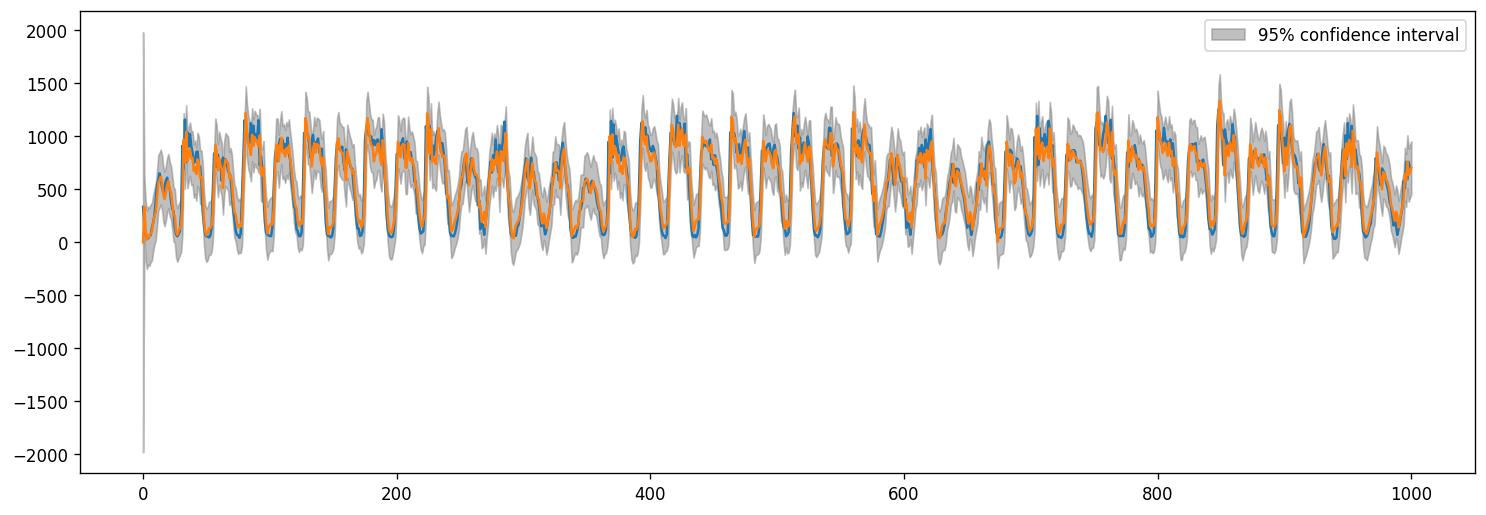

In [16]:
fig, ax = plt.subplots()
ax.plot(madrid[:1000,0])
plot_predict(modelfit,0,1000, ax=ax)
plt.show()